<a href="https://colab.research.google.com/github/tansla/HWs_git/blob/master/H_W_3_convolution_theory_Hadas_Tatiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutions and Dimensions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

### Convlutions 


In [ ]:
k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0 ,0] ])
k2 = np.array([ [0, 0, 0], [0, 0 ,1], [0, 0, 0] ])
k3 = np.array([ [-1,-1, -1], [-1, 8 ,-1], [-1, -1 ,-1] ])
k4 = np.array([ [1, 1, 1], [1 ,1 ,1], [1, 1 ,1] ]) / 9

#### Apply to arrays (20 points)
Apply the convolutions above to the following array, using numpy:


In [ ]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [ ]:
# (x[:3,:3] * k1).sum()
def apply_convo(arr, filter):
  convo = np.zeros(np.array(arr.shape)-[2,2])
  i=0
  for row in np.lib.stride_tricks.sliding_window_view(arr, (3, 3)):
    convo[i] = [(r*filter).sum() for r in row]
    i +=1
  return convo

In [ ]:
# Write your answer here
print('Aplying K1')
print(apply_convo(x,k1))
print('-'*15)
print('Aplying K2')
print(apply_convo(x,k2))
print('-'*15)
print('Aplying K3')
print(apply_convo(x,k3))
print('-'*15)
print('Aplying K4')
print(apply_convo(x,k4))
print('-'*15)



Aplying K1
[[-2. -4.  0.]
 [-2.  2.  2.]
 [-3. -4. -4.]]
---------------
Aplying K2
[[-4.  0. -2.]
 [ 2.  2.  3.]
 [-4. -4. -2.]]
---------------
Aplying K3
[[ -3. -25.   4.]
 [ -4.  33.  27.]
 [-13. -27. -36.]]
---------------
Aplying K4
[[-1.66666667 -1.22222222 -0.44444444]
 [-1.55555556 -1.66666667 -1.        ]
 [-1.55555556 -1.          0.        ]]
---------------


#### Apply to images (20 points)
Apply the convolution filters above on the image. You should convert the image to grayscale, and apply the filters on the grayscale image. 
Show the results:

<ipython-input-6-fd7cb8a12b84>:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = scipy.misc.face()


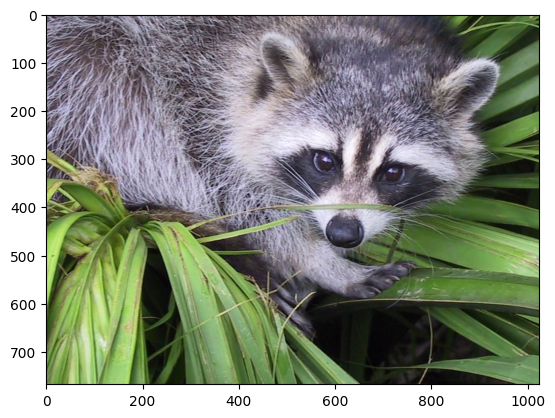

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
face = scipy.misc.face()
plt.imshow(face); plt.show()

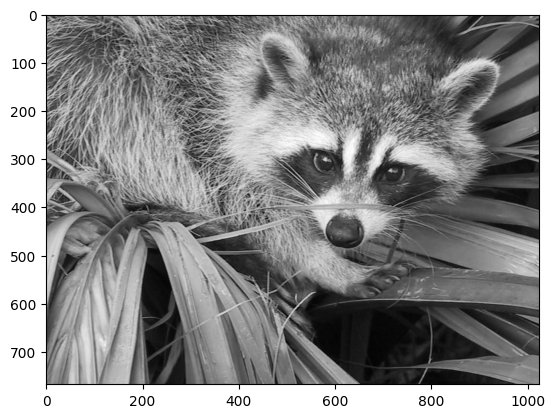

In [ ]:
# Write your answer here
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.299 * r + 0.587 * g + 0.114 * b

    return gray

grey_face = rgb2gray(face)

plt.imshow(grey_face, cmap='gray'); plt.show()

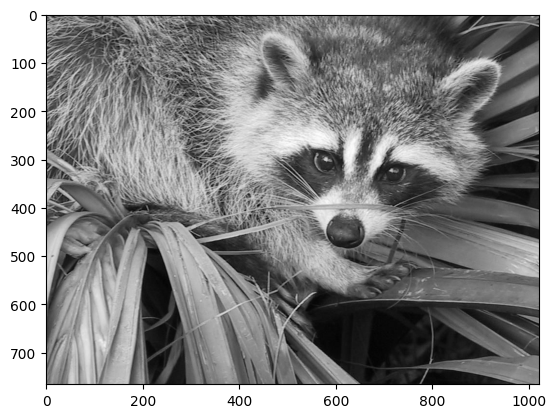

In [ ]:
plt.imshow(apply_convo(grey_face,k1), cmap='gray'); plt.show()

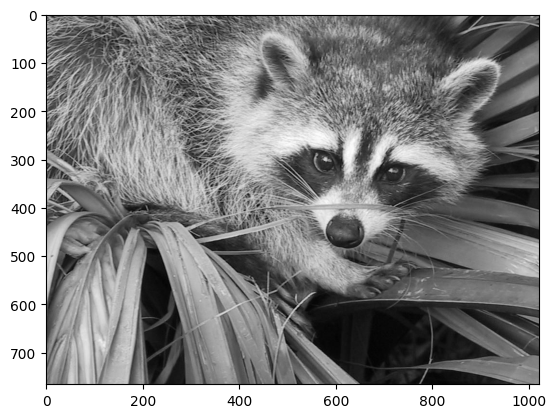

In [ ]:
plt.imshow(apply_convo(grey_face,k2), cmap='gray'); plt.show()

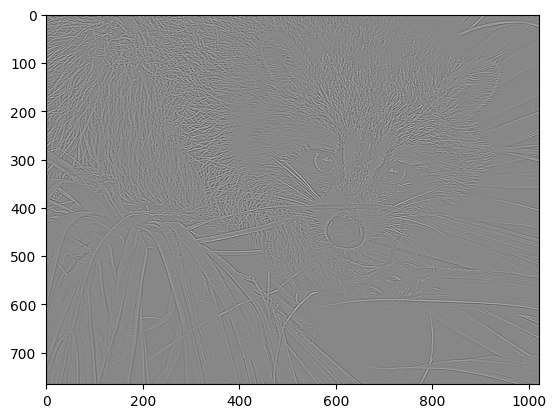

In [ ]:
plt.imshow(apply_convo(grey_face,k3), cmap='gray'); plt.show()

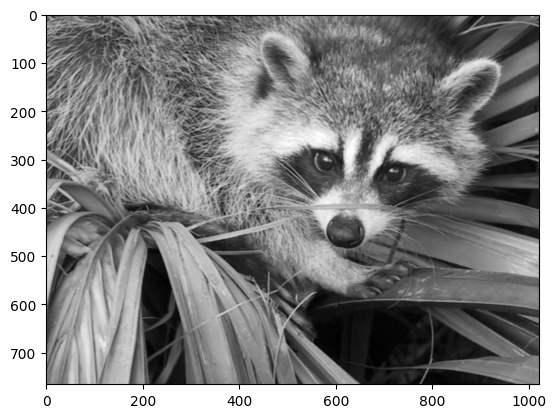

In [ ]:
plt.imshow(apply_convo(grey_face,k4), cmap='gray'); plt.show()

### Comments:

The changes except for K3 is almost not seen, but there are here!

## Dimensions (20 points)

What would be the output dimensions in these cases (input size is NxN)?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account the padding option and the stride. 

'Zero padding' means that we padded by floor(kernel_sz/2) in every dimension

#### Answer

Let denote:

*   N: the size of the input image
*   K: the size of the kernel
*   P: the amount of padding used, that for Zero padding $=floor(\frac{K}{2})$
*   S: the stride used

So:

1. No padding, stride of 1

For kernels of size 3x3 one layer became on a 2 size less in each dimention as a result that we do not have values for the border rows and columns. So, NxN => (N-2)x(N-2).

For kernels of size 5x5, NxN => (N-4)x(N-4).

For kernels of size 7x7, NxN => (N-6)x(N-6).

2. No padding, stride of 2

In this case our layer shrink because each the Kernel size take out from borders by $floor(\frac{K}{2})$ and also because of the stride we decrease the number of output like twice while we slide the filter, to be more accurate: $(\frac{N - K}{S} + 1)x(\frac{N - K}{S} + 1)$

3. Zero padding, stride of 1

The layer will be the same (NxN) for all Kernels since we add 0 as a padding to compensate the filter.


4. Zero padding, stride of 2

By using padding we compensate to the shrink of the layer from size of the filter, but the stride will lead to decrease and the new layer will be (N/2 + 1)x(N/2 +1)


In [ ]:
# Write your answer here

So, the in general the formula is:

$$\frac{(N - K + 2P)}{S} + 1$$


where:

N: the size of the input image

K: the size of the kernel

P: the amount of padding used, that for Zero padding $=floor(\frac{K}{2})$

S: the stride used

### Network dimensions (40 points)
Below is a network architecture suggestion for classificy MNIST data.
Write: \\
(1) the output dimensions of evrry layer in the format (C,W,H) -> (#channels, width, height) \\
(2) the number of parameters at every layer \\
(3) number of calculations made in each layer

- Convolutional Layer #1: Applies 32 5x5 filters, with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


In [ ]:
# Write your answer here

The MNIST datset includes black-and-white images of size 28X28 pixles.   

**Convolutional Layer #1**
1. (32, 24, 24)
2. 32 X 5 X 5 X 1 + 32 = 832 parameters
3. 1 X 24 X 24 X 5 X 5 X 32 = 460.8 million calculaions


**Pooling Layer #1**
1. (32, 12, 12)
2. 0 parameters
3. 12 X 12 X 32 = 4608 times calculates max() function
 
**Convolutional Layer #2**
1. (64, 8, 8)
2. 64 X 5 X 5 X 32 + 64 = 51264 parameters
3. 64 X 8 X 8 X 5 X 5 X 32 = 3,276,800 calculaions

 
**Pooling Layer #2**
1. (64, 4, 4)
2. 0 parameters
3. 4 X 4 X 64 = 1024 times calculates max() function
 
**Dense Layer #1**
1. (1, 1, 1024)
2. 64 X 4 X 4 X 1024 + 1024 = 1,049,600 X 0.6 = 629,760 parameters (to learn after drop-out)
3. 629,760 calculaions

 
**Dense Layer #2**
1. (1, 1, 10)
2. 1024 X 10 + 10 = 1,0250 parameters
3. 10,250 calculaions

 

In [ ]:
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dense layers
        self.fc1 = nn.Linear(in_features=64*4*4, out_features=1024)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(in_features=1024, out_features=10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = x.view(-1, 64*4*4)  # Flatten the output from the second convolutional layer
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x






In [ ]:

!pip install torchsummary 
from torchsummary import summary
model = CNNModel()
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
              ReLU-2           [-1, 32, 24, 24]               0
         MaxPool2d-3           [-1, 32, 12, 12]               0
            Conv2d-4             [-1, 64, 8, 8]          51,264
              ReLU-5             [-1, 64, 8, 8]               0
         MaxPool2d-6             [-1, 64, 4, 4]               0
            Linear-7                 [-1, 1024]       1,049,600
              ReLU-8                 [-1, 1024]               0
           Dropout-9                 [-1, 1024]               0
           Linear-10                   [-1, 10]          10,250
Total params: 1,111,946
Trainable params: 1,111,946
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.41
Params size (MB): 4.24
Estimat